In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
df.isnull().mean()*100

Unnamed: 0         0.0
YearsExperience    0.0
Salary             0.0
dtype: float64

In [5]:
df.shape

(30, 3)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [7]:
df.drop(columns='Unnamed: 0',inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.duplicated().sum()

0

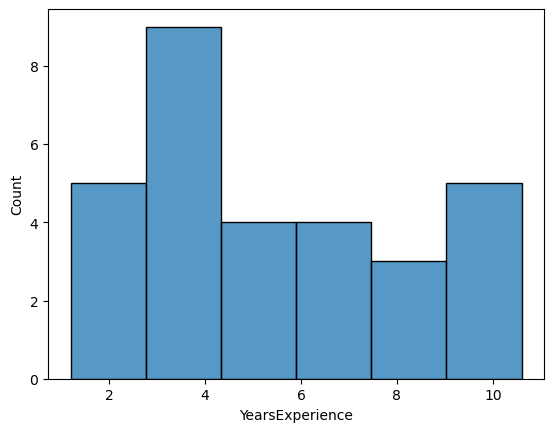

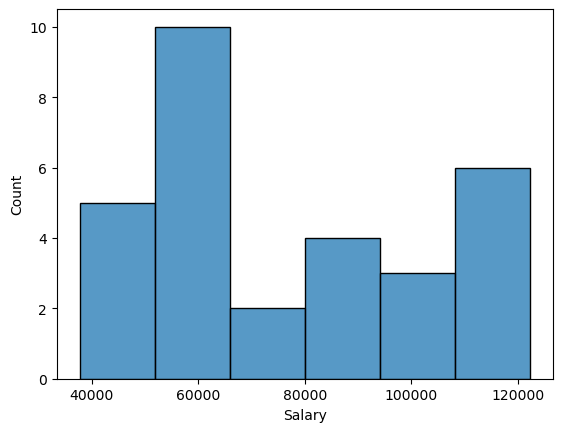

In [10]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

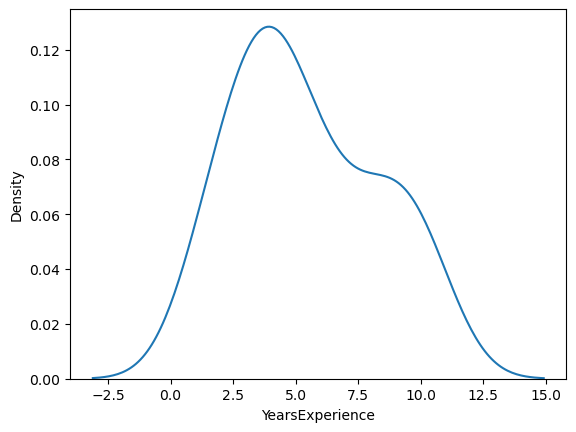

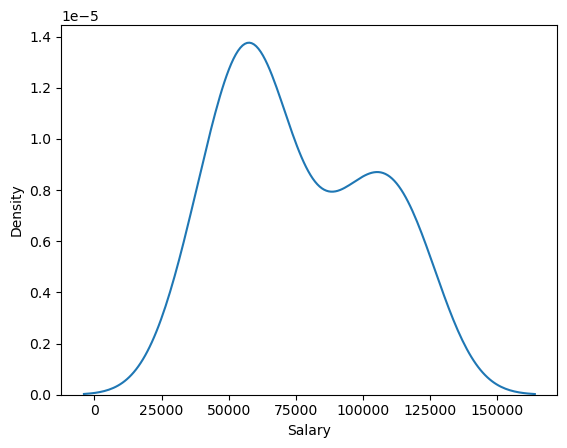

In [11]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.kdeplot(x=df[i])
        plt.show()

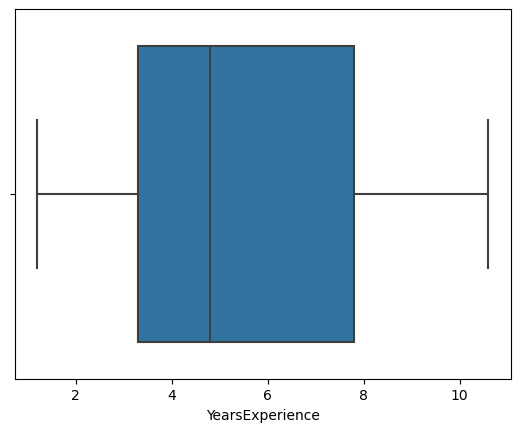

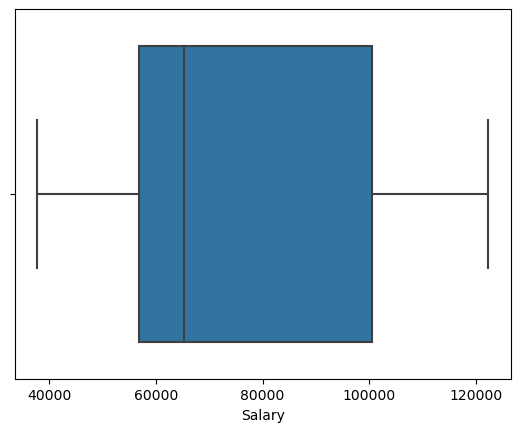

In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(x=df[i])
        plt.show()

### treating outliers

In [ ]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [ ]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

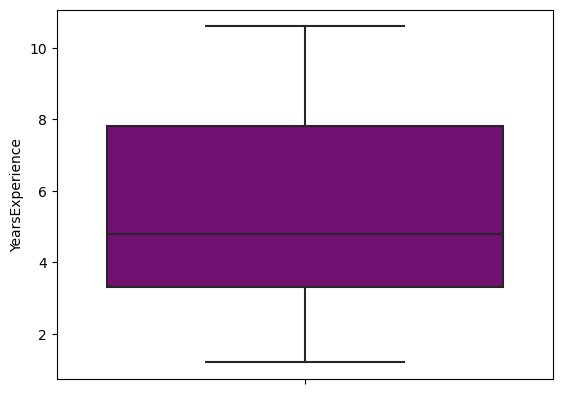

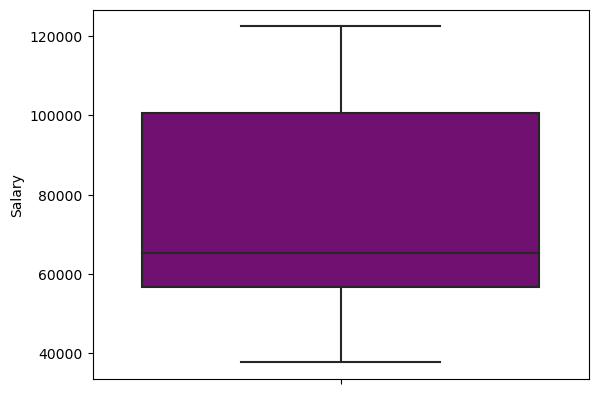

In [41]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='purple')
        plt.show()

In [42]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

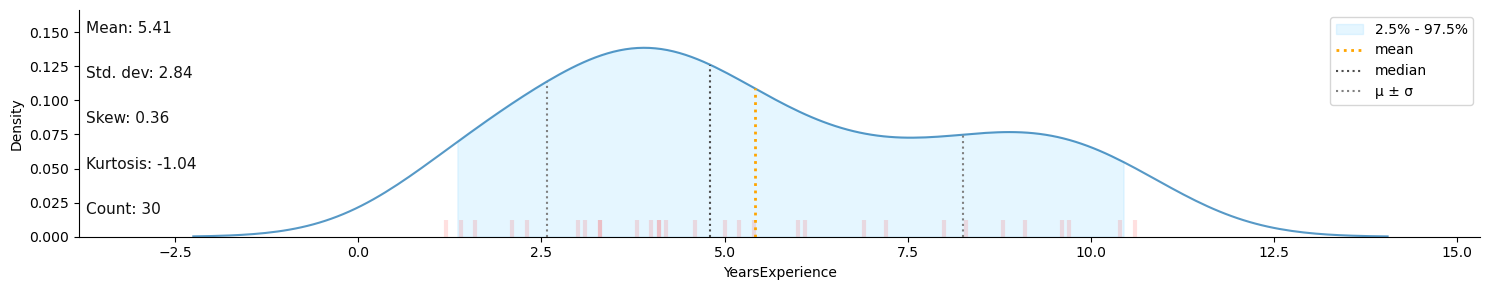

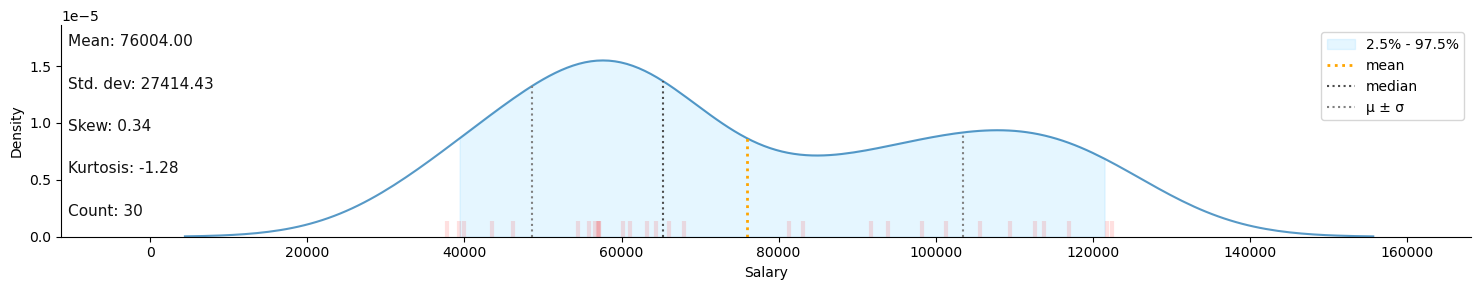

In [13]:
k.dist_plot(data=df);

In [14]:
df.corr()['Salary']


YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64

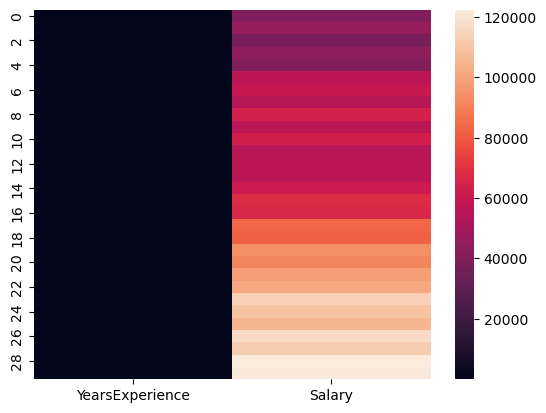

In [18]:
sns.heatmap(data=df,annot=False)
plt.show()

In [19]:
x=df[['YearsExperience']].values
y=df[['Salary']].values

In [20]:
sc=StandardScaler()

In [21]:
x=sc.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### model building

In [24]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),

}

In [25]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 98.8169515729126
training_score: 94.11949620562126
testing_score: 98.8169515729126
mae: 2446.172369046504
mse: 12823412.298126534
rmse_test: 3580.979237321341
****************************************************************************************************
model trained with Ridge
r2score: 98.20095019171659
training_score: 93.91715015039128
testing_score: 98.20095019171659
mae: 3671.0288254218017
mse: 19500433.71705489
rmse_test: 4415.929541676915
****************************************************************************************************
model trained with LinearSVR
r2score: -657.9421678796243
training_score: -887.5073336186583
testing_score: -657.9421678796243
mae: 84447.96850035586
mse: 8215559646.0112295
rmse_test: 90639.72443697757
****************************************************************************************************
model trained with Lasso
r2score: 98.81656406322269
training_score: 94.11949601579876
testing_sc

In [26]:
ABR = AdaBoostRegressor()

In [27]:
ABR.fit(x_train, y_train)

AdaBoostRegressor()

In [35]:
y_pred = ABR.predict(x_test)
y_pred

array([ 43526.        , 121873.        ,  59446.        ,  58982.        ,
       110285.6       , 109501.83333333])

In [36]:
PREDICTION = pd.DataFrame(zip(y_test, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,37732.0,43526.000000
1,122392.0,121873.000000
2,57082.0,59446.000000
3,63219.0,58982.000000
4,116970.0,110285.600000
5,109432.0,109501.833333


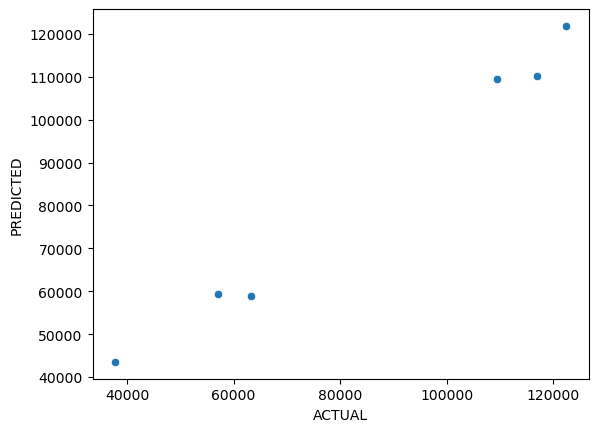

In [37]:
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

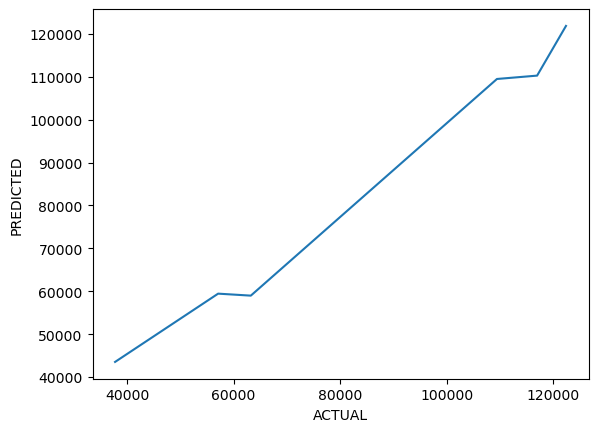

In [38]:
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

In [39]:
model.score(x_train,y_train)

0.9874304167562599

In [40]:
model.score(x_test,y_test)

0.9790471622861648

In [46]:
y_pred1 = ABR.predict(x)
y_pred1

array([ 39892.        ,  43526.        ,  43526.        ,  43049.        ,
        41996.66666667,  59377.5       ,  59377.5       ,  59377.5       ,
        59377.5       ,  58958.        ,  58982.        ,  58982.        ,
        58982.        ,  59446.        ,  61288.66666667,  66030.        ,
        66030.        ,  82514.        ,  82226.5       ,  93941.        ,
        93941.        ,  98849.        , 101303.        , 109698.        ,
       109501.83333333, 109501.83333333, 110285.6       , 110285.6       ,
       121873.        , 121873.        ])

In [47]:
PREDICTION = pd.DataFrame(zip(y, y_pred1), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,39344.0,39892.000000
1,46206.0,43526.000000
2,37732.0,43526.000000
3,43526.0,43049.000000
4,39892.0,41996.666667
5,56643.0,59377.500000
6,60151.0,59377.500000
7,54446.0,59377.500000
8,64446.0,59377.500000
9,57190.0,58958.000000


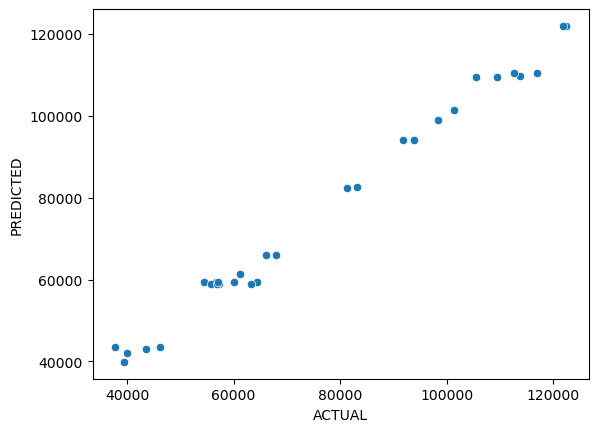

In [48]:
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

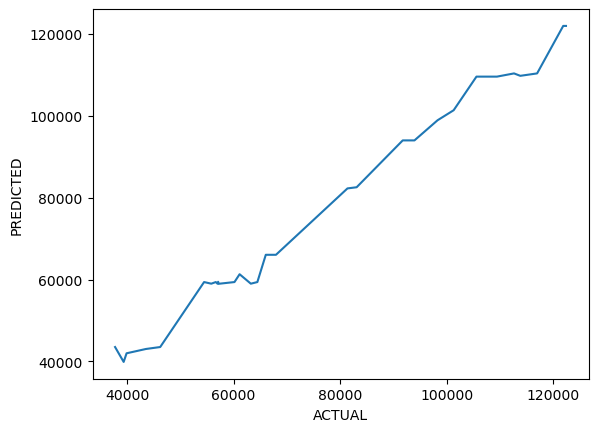

In [49]:
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

In [50]:
model.score(x_train,y_train)

0.9874304167562599

In [51]:
model.score(x,y)

0.9852389705389948